In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [12]:
# Création de l'environnement MountainCar
env = gym.make('MountainCar-v0')

# Définition de la fonction d'état discrète
def discretize_state(state):
    if isinstance(state, np.ndarray):
        pos = int((state[0] - env_low[0]) / env_distance[0])
        vel = int((state[1] - env_low[1]) / env_distance[1])
    else:
        pos = int((state[0][0] - env_low[0]) / env_distance[0])
        vel = int((state[0][1] - env_low[1]) / env_distance[1])
    return pos, vel

In [17]:
# Définition des paramètres d'apprentissage
n_states = (20, 20)  # nombre d'états discrets
n_actions = env.action_space.n  # nombre d'actions possibles
q_table = np.zeros(n_states + (n_actions,))  # table Q initiale
epsilon = 0.1  # taux d'exploration initial
epsilon_min = 0.01  # taux d'exploration minimal
epsilon_decay = 0.995  # taux de décroissance de l'exploration
alpha = 0.5  # taux d'apprentissage
gamma = 0.99  # facteur d'escompte
n_episodes = 5000  # nombre d'épisodes à simuler

In [18]:
# Calcul des bornes de l'environnement et des intervalles discrets
env_low = env.observation_space.low
env_high = env.observation_space.high
env_distance = (env_high - env_low) / n_states

In [19]:
# Simulation de l'apprentissage
for episode in range(n_episodes):
    state = env.reset()
    pos, vel = discretize_state(state)
    done = False
    while not done:
        if np.random.uniform() < epsilon:
            # Exploration : choisir une action aléatoire
            action = env.action_space.sample()
        else:
            # Exploitation : choisir l'action qui maximise Q
            action = np.argmax(q_table[pos][vel])
        # Exécution de l'action choisie
        step_result = env.step(action)
        next_state, reward, done = step_result[0], step_result[1], step_result[2]
        next_pos, next_vel = discretize_state(next_state)
        # Mise à jour de la table Q
        q_table[pos][vel][action] += alpha * (reward + gamma * np.max(q_table[next_pos][next_vel]) - q_table[pos][vel][action])
        pos, vel = next_pos, next_vel
    # Réduction du taux d'exploration
    epsilon *= epsilon_decay
    epsilon = max(epsilon_min, epsilon)

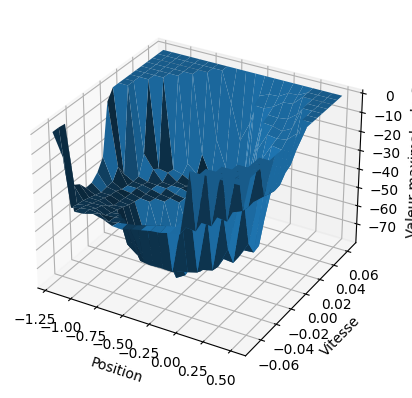

In [16]:
# Affichage de la fonction Q
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(env_low[0], env_high[0], env_distance[0])
y = np.arange(env_low[1], env_high[1], env_distance[1])
X, Y = np.meshgrid(x, y)
Z = np.max(q_table, axis=2)
ax.plot_surface(X, Y, Z)
ax.set_xlabel('Position')
ax.set_ylabel('Vitesse')
ax.set_zlabel('Valeur maximale de Q')
# Simulation de la politique apprise
state = env.reset()
pos, vel = discretize_state(state)
